In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; } </style>"))
from random import randint

In [2]:
class mynode:
    def __init__(self,parent,ID,value=None):
        self.ID=ID
        self.parent=parent
        self.value=value
        self.children=[]

    def append(self,ID,value=None):
        child=mynode(parent=self,ID=ID,value=value)
        self.children.append(child)
        return child
        
    def create_subgraph(self,graph,labels):
        if self.value is not None:
            labels[self.ID]=str(self.value)
        for child in self.children:
            graph.add_node(child.ID)
            graph.add_edge(self.ID,child.ID)
            if child.value is not None:
                labels[child.ID]=str(child.value)
            else:
                labels[child.ID]=''
            child.create_subgraph(graph,labels)
        

class mygraph:
    def __init__(self,centralnode=None):
        self.centralnode=centralnode
        self.labels={}
        
    def create_graph(self,graph):
        self.graph=graph
        self.centralnode.create_subgraph(self.graph,self.labels)
        #nx.draw(self.graph)

In [16]:
centralnode=mynode(None,1)
for i in range(3):
    next0=centralnode.append(10+i)
    for j in range(3):
        next1=next0.append(100+i*10+j)
        for k in range(3):
            next2=next1.append(next1.ID*10+k)
            for l in range(3):
                next3=next2.append(next2.ID*10+l,value=randint(0,99))
#                for m in range(3):
#                    next4=next3.append(next3.ID*10+m,value=randint(0,99))

In [4]:
def minimax(node,depth,minormax):
    if depth==0:
        H.labels[node.ID]=(node.value,1)
        return node.value,node,
    else:
        values=[]
        ndepth=depth-1
        bestval=-1*minormax*1e18
        bestnode=None
        for child in node.children:
            nextval,_=minimax(child,ndepth,-1*minormax)
            if minormax>0:
                if nextval>bestval:
                    bestval=nextval
                    bestnode=child
            else:
                if nextval<bestval:
                    bestval=nextval
                    bestnode=child
        node.value=bestval
        H.labels[node.ID]=(node.value,minormax*100,100)
        return bestval,bestnode


In [91]:
def alphabeta(node,depth,minormax,alpha,beta):
    if depth==0:
        H.labels[node.ID]=(node.value)
        return node,node.value,node.value,
    else:
        values=[]
        ndepth=depth-1
        bestnode=None
        for child in node.children:
            if alpha>beta:
                #print("break",depth,alpha,beta)
                break
            #print(depth,alpha,beta)
            _,new_alpha,new_beta=alphabeta(child,ndepth,-1*minormax,alpha,beta)
            if minormax>0:
                if new_beta>alpha:
                    alpha=new_beta
                    bestnode=child
            else:
                if new_alpha<beta:
                    beta=new_alpha
                    bestnode=child
        if minormax>0:
            node.value=alpha
        else:
            node.value=beta
        H.labels[node.ID]=(node.value,alpha,beta)
        return bestnode,alpha,beta,



In [80]:
G=nx.DiGraph()
H=mygraph(centralnode)
H.create_graph(G)
mm=1


        


In [85]:
H.labels={}
minimax(centralnode,4,1)

(70, <__main__.mynode at 0x7f7e3056d7f0>)

In [92]:
H.labels={}

print(H.labels)
alphabeta(centralnode,4,1,-1e6,1e6)
print(H.labels)

{}
{10000: 97, 10001: 70, 10002: 29, 1000: (29, -1000000.0, 29), 10010: 89, 10011: 98, 10012: 98, 1001: (89, 29, 89), 10020: 77, 1002: (77, 89, 77), 100: (89, 89, 1000000.0), 10100: 31, 10101: 99, 10102: 4, 1010: (4, -1000000.0, 4), 10110: 97, 10111: 78, 10112: 88, 1011: (78, 4, 78), 10120: 99, 10121: 72, 1012: (72, 78, 72), 101: (78, 78, 89), 10200: 7, 10201: 84, 10202: 67, 1020: (7, -1000000.0, 7), 10210: 3, 1021: (3, 7, 3), 10220: 70, 10221: 98, 10222: 98, 1022: (70, 7, 70), 102: (70, 70, 78), 10: (70, -1000000.0, 70), 11000: 98, 11001: 98, 11002: 1, 1100: (1, 70, 1), 11010: 1, 1101: (1, 70, 1), 11020: 1, 1102: (1, 70, 1), 110: (70, 70, 1000000.0), 11100: 50, 1110: (50, 70, 50), 11110: 40, 1111: (40, 70, 40), 11120: 22, 1112: (22, 70, 22), 111: (70, 70, 70), 11200: 3, 1120: (3, 70, 3), 11210: 98, 11211: 31, 1121: (31, 70, 31), 11220: 47, 1122: (47, 70, 47), 112: (70, 70, 70), 11: (70, 70, 70), 12000: 81, 12001: 69, 1200: (69, 70, 69), 12010: 87, 12011: 16, 1201: (16, 70, 16), 12020:

<IPython.core.display.Javascript object>


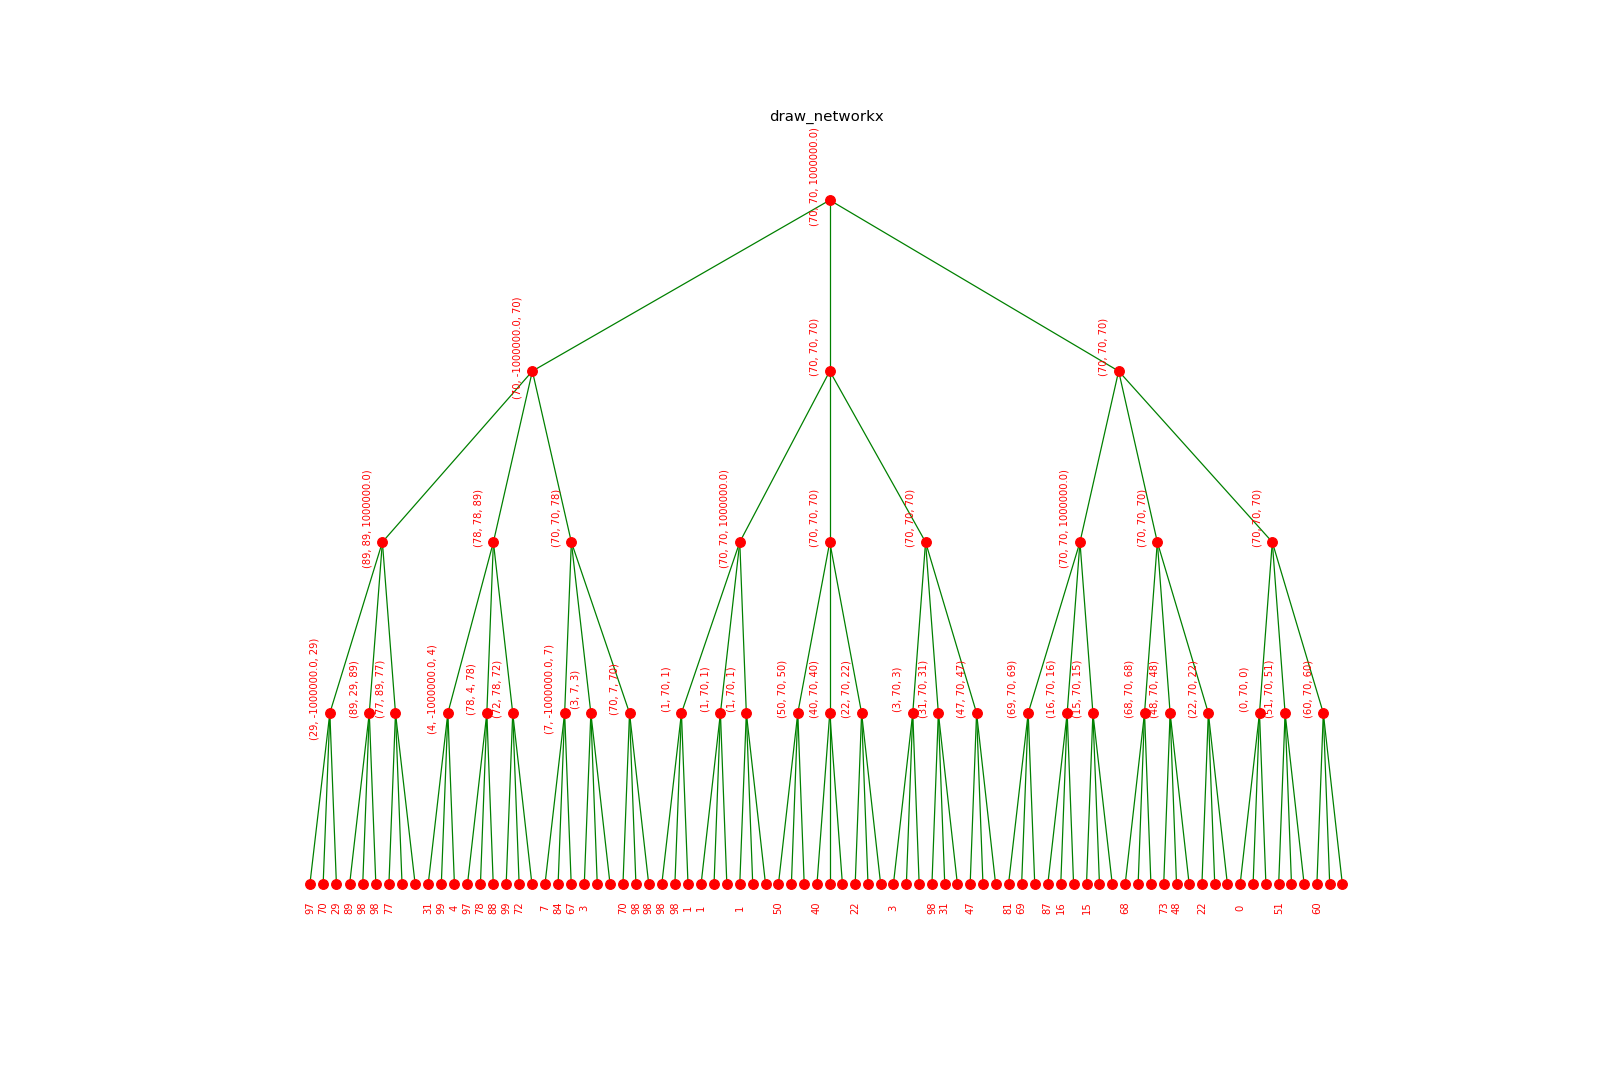

In [93]:
%matplotlib notebook
plt.figure(3,figsize=(18,12)) 


plt.title('draw_networkx')
pos =graphviz_layout(G, prog='dot')
labels={}
post=pos.copy()
for node in G.nodes:
    if node >= 10000:
        post[node]=(post[node][0],post[node][1]-10)
    else:
        post[node]=(post[node][0]-100,post[node][1]+10)
#write_dot(G,'test.dot')
#G.draw()
nx.draw(G, pos, with_labels=False, arrows=False,node_size=60,font_size=8,edge_color='g')
text=nx.draw_networkx_labels(G,post,H.labels,font_size=8,font_color='r')
for _,t in text.items():
    t.set_rotation('vertical')

In [73]:
centralnode.children[1].children[0].children[1].children[0].value=1

<IPython.core.display.Javascript object>


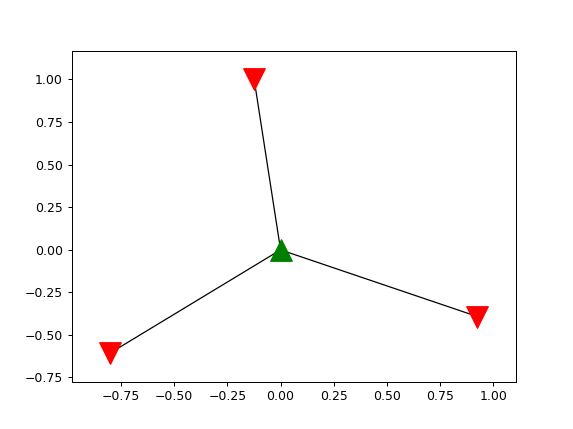

In [75]:
%matplotlib notebook
b=3
G = nx.Graph()
G.add_node(1)
for i in range(b):
    G.add_node(10+i) # You can also add a list of nodes by passing a list argument
    G.add_edge(1,10+i)

# Add edges 

#e = (2,3)
#G.add_edge(*e) # * unpacks the tuple
#G.add_edges_from([(1,11), (1,12),(1,13)]) # Just like nodes we can add edges from a list
pos=nx.spring_layout(G)
#pos=nx.circular_layout(G)
nx.draw_networkx_nodes(G,pos,nodelist=[1],node_shape='^',node_color='g')
nx.draw_networkx_nodes(G,pos,nodelist=[10,11,12],node_shape='v')
nx.draw_networkx_edges(G,pos)

In [19]:
H=G.subgraph((1,2))

<IPython.core.display.Javascript object>


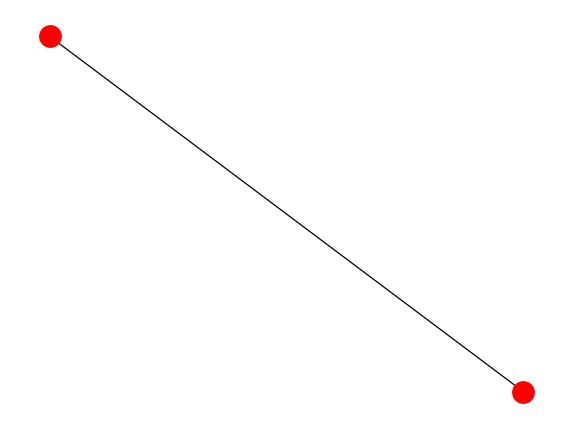

In [20]:
%matplotlib notebook
nx.draw(H)